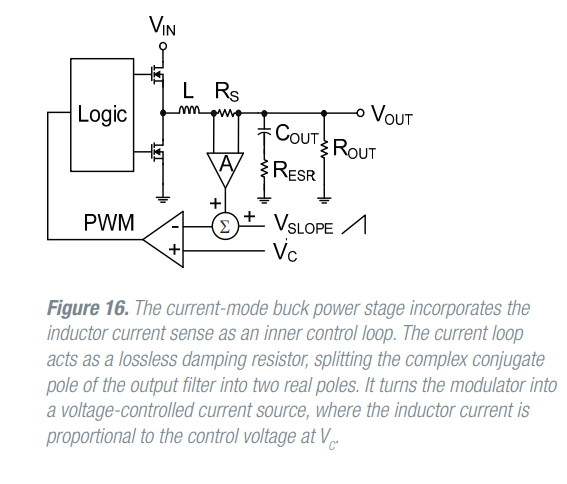

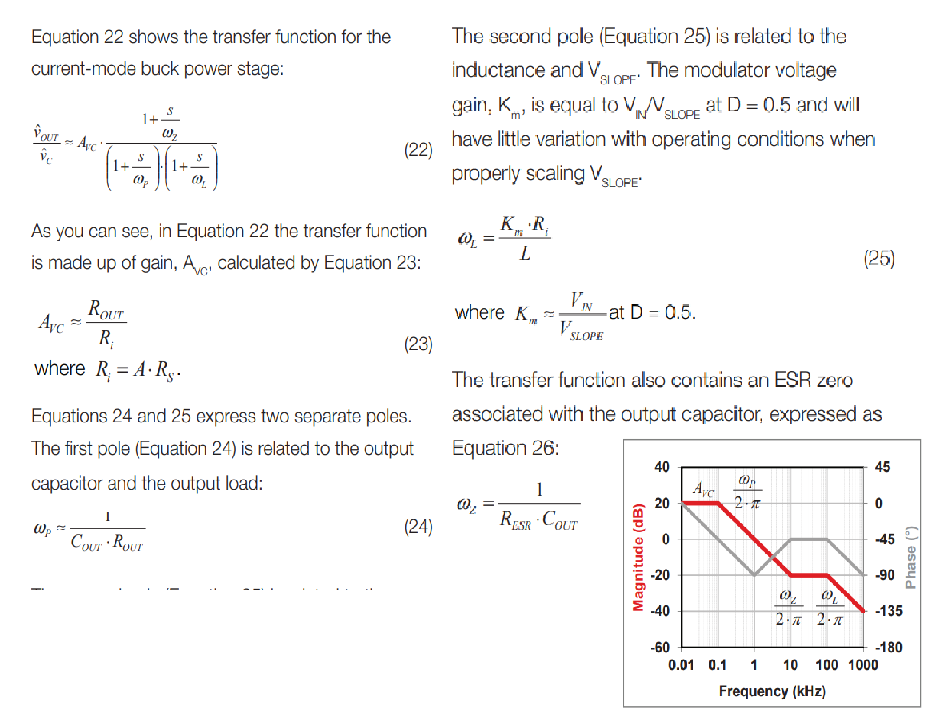

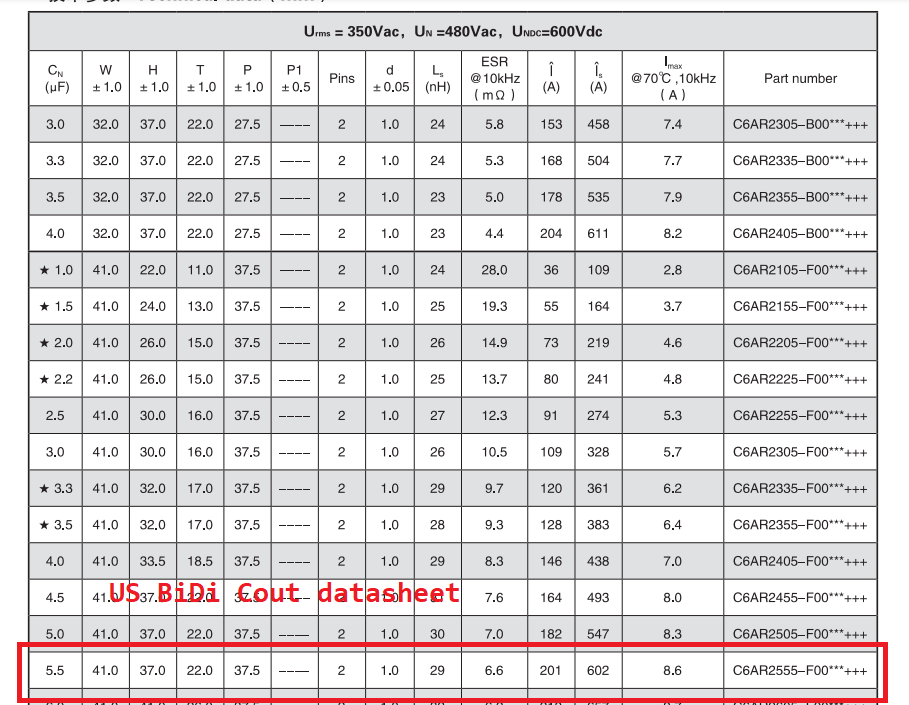

In [6]:
# Current mode voltage controlled Buck converter transfer fumction
# from https://www.ti.com/seclit/ml/slup340/slup340.pdf
# page 9,10. Equation (22)
#
import numpy as np
import matplotlib.pyplot as plt

# BiDi AC/DC
############
L=280e-6
Cout=5.5e-6
Resr=6e-3    # Capacitor datasheet - http://files.faratronic.com/book/C6A.pdf
Rout=100     # Load resistance
Avc = 1      # LEM +lowLevel Software measure Current in Ampere[A]
Ri  = 1      # Measure is in ampere. in general Ri=A*Rshunt
Fs  = 48000
Vin  = 650   # Vdc bus
Vout = 155  # hald 310V
#
###############
# Calculations
###############
Wz = 1/(Resr*Cout)
Wp=  1/(Rout*Cout)
#Wl calculation
Vslope = Vout*Ri/(L*Fs)# only for peak current control
Km = Vin/Vslope
Wl = Km*Ri/L
print ('Wp=',Wp/(2*np.pi),'Hz    Wz=',Wz/(6.28*1000000),'MHz     Wl=',Wl/(6.28*1000),'KHz')
if Wz/(2*np.pi)>1e4:
    print ('Error - extremply high Wz. Please check the capacitor datasheet!')

Wp= 289.37262380344606 Hz    Wz= 4.825323296660876 MHz     Wl= 32.05259913704541 KHz
Error - extremply high Wz? Please check Cout datasheet!


In [11]:
# Calculate the transfer function 
f1 = 1*2*np.pi                         # 1   Hz 
f2 = 100000*2*np.pi                    # 100 KHz
W=np.linspace(f1,f2,100000)
y= Avc*(1+W/Wz)/((1+W/Wp)*(1+W/Wl))    # equation (22)
#
plt.figsize(16,12)
plt.semilogx(W/6.28,20*np.log10(y)) 
plt.title('TRANSFER FUNCTION dc-dc buck converter current mode ')
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Gain [dB]') 
plt.grid(which='both', axis='both')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'